# 1.1

In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_histogram
from numpy.random import randint

In [2]:
# Setting the random seed
np.random.seed(seed=123) # You may choose any seed instead of just `0'
n = 4 # This is the number of bits in the string

# alice_bits = randint(2, size=n)
# print(alice_bits)

In [3]:
# alice_mem = []
# bob_mem = []

In [4]:
# for i in range(10):

q = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q, c)

alice_bits = randint(2, size=n)
print(alice_bits)

#     temp = ''
#     for i in range(4) : temp += str(alice_bits[i])
#     alice_mem.append(temp)

# HSB
circuit.h(q[1])
circuit.cnot(q[1], q[0])

if alice_bits[0] == 1 : circuit.z(q[0])
if alice_bits[1] == 1 : circuit.x(q[0])

circuit.i(q[0])
circuit.cnot(q[0], q[1])
circuit.h(q[0])

# LSB
circuit.h(q[3])
circuit.cnot(q[3], q[2])

if alice_bits[2] == 1 : circuit.z(q[2])
if alice_bits[3] == 1 : circuit.x(q[2])

circuit.i(q[2])
circuit.cnot(q[2], q[3])
circuit.h(q[2])

circuit.measure(q, c)

circuit.draw()

[0 1 0 0]


┌───┐┌───┐┌───┐     ┌───┐   ┌─┐
q0_0: ─────┤ X ├┤ X ├┤ I ├──■──┤ H ├───┤M├
      ┌───┐└─┬─┘└───┘└───┘┌─┴─┐└┬─┬┘   └╥┘
q0_1: ┤ H ├──■────────────┤ X ├─┤M├─────╫─
      └───┘┌───┐┌───┐     ├───┤ └╥┘ ┌─┐ ║ 
q0_2: ─────┤ X ├┤ I ├──■──┤ H ├──╫──┤M├─╫─
      ┌───┐└─┬─┘└───┘┌─┴─┐└┬─┬┘  ║  └╥┘ ║ 
q0_3: ┤ H ├──■───────┤ X ├─┤M├───╫───╫──╫─
      └───┘          └───┘ └╥┘   ║   ║  ║ 
c0: 4/══════════════════════╩════╩═══╩══╩═
                            3    1   2  0

{'0010': 256}


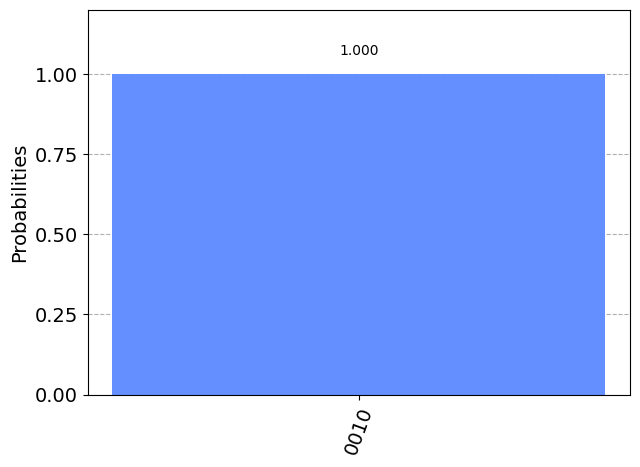

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=256, memory=True) # memory=True
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

#     mem = result.get_memory()
#     bob_mem.append(mem[0])

In [6]:
# print(alice_mem)
# print(bob_mem)

mem = result.get_memory()
# print(mem)

target = ''
for i in range(len(alice_bits)):
    target += str(alice_bits[len(alice_bits)-1-i])
# print(target)
# print(target==mem[0])

# ==================================================

# SER/PER
sym_bits = 2
total_sym = len(mem) * (len(mem[0])/sym_bits)
error_sym = 0
for i in range(len(mem)):
    for j in range(int(len(mem[0])/sym_bits)):
        if target[j*sym_bits:(j+1)*sym_bits] != mem[i][j*sym_bits:(j+1)*sym_bits]:
            error_sym += 1
print("SER = ", error_sym / total_sym)

# BER
sym_bits = 1
total_sym = len(mem) * (len(mem[0])/sym_bits)
error_sym = 0
for i in range(len(mem)):
    for j in range(int(len(mem[0])/sym_bits)):
        if target[j*sym_bits:(j+1)*sym_bits] != mem[i][j*sym_bits:(j+1)*sym_bits]:
            error_sym += 1
print("BER = ", error_sym / total_sym)

SER =  0.0
BER =  0.0


# 1.2

In [7]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

apitoken = "8f84cb4cd160cd4c1ca646b369894917e3cb1cd76a7dfcb48cf76d5cd9a44e3a08c86c0e3a456c6a7b3d24de29d8e5d10972fd0dd9272631451066746885e1b4"
IBMQ.save_account(apitoken)

configrc.store_credentials:WARNING:2022-10-03 13:34:25,121: Credentials already present. Set overwrite=True to overwrite.


In [8]:
# shots = 256

# Load local account information
# IBMQ.load_account()

# # Get the least busy backend
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x:
# x.configuration().n_qubits >= 2
# and not x.configuration().simulator
# and x.status().operational==True))
# print("least busy backend: ", backend)

# Run our circuit
# job = execute(qc, backend=backend, shots=shots)

In [9]:
# alice_mem = []
# bob_mem = []
from qiskit.tools.monitor import job_monitor

In [10]:
# for i in range(256):

q = QuantumRegister(4)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q, c)

# alice_bits = randint(2, size=n)
print(alice_bits)

#     temp = ''
#     for i in range(4) : temp += str(alice_bits[i])
#     alice_mem.append(temp)

# HSB
circuit.h(q[1])
circuit.cnot(q[1], q[0])

if alice_bits[0] == 1 : circuit.z(q[0])
if alice_bits[1] == 1 : circuit.x(q[0])

circuit.i(q[0])
circuit.cnot(q[0], q[1])
circuit.h(q[0])

# LSB
circuit.h(q[3])
circuit.cnot(q[3], q[2])

if alice_bits[2] == 1 : circuit.z(q[2])
if alice_bits[3] == 1 : circuit.x(q[2])

circuit.i(q[2])
circuit.cnot(q[2], q[3])
circuit.h(q[2])

circuit.measure(q, c)

circuit.draw()

#     mem = result.get_memory()
#     bob_mem.append(mem[0])

[0 1 0 0]


┌───┐┌───┐┌───┐     ┌───┐   ┌─┐
q14_0: ─────┤ X ├┤ X ├┤ I ├──■──┤ H ├───┤M├
       ┌───┐└─┬─┘└───┘└───┘┌─┴─┐└┬─┬┘   └╥┘
q14_1: ┤ H ├──■────────────┤ X ├─┤M├─────╫─
       └───┘┌───┐┌───┐     ├───┤ └╥┘ ┌─┐ ║ 
q14_2: ─────┤ X ├┤ I ├──■──┤ H ├──╫──┤M├─╫─
       ┌───┐└─┬─┘└───┘┌─┴─┐└┬─┬┘  ║  └╥┘ ║ 
q14_3: ┤ H ├──■───────┤ X ├─┤M├───╫───╫──╫─
       └───┘          └───┘ └╥┘   ║   ║  ║ 
 c1: 4/══════════════════════╩════╩═══╩══╩═
                             3    1   2  0

In [11]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
qcomp = provider.get_backend('ibmq_manila')
job = execute(circuit, backend=qcomp, shots=256, memory=True)

job_monitor(job)

Job Status: job has successfully run


{'0000': 11, '0001': 1, '0010': 222, '0011': 9, '0100': 1, '0110': 3, '0111': 1, '1010': 7, '1110': 1}


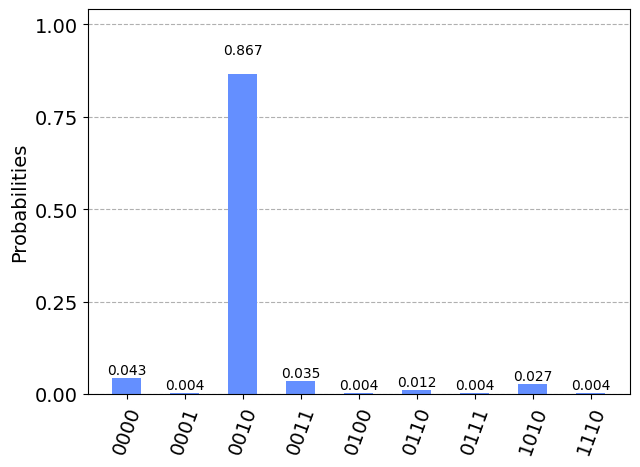

In [12]:
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [13]:
mem = result.get_memory()
# print(mem)

target = ''
for i in range(len(alice_bits)):
    target += str(alice_bits[len(alice_bits)-1-i])
# print(target)
# print(target==mem[0])

# ==================================================

# SER/PER
sym_bits = 2
total_sym = len(mem) * (len(mem[0])/sym_bits)
error_sym = 0
for i in range(len(mem)):
    for j in range(int(len(mem[0])/sym_bits)):
        if target[j*sym_bits:(j+1)*sym_bits] != mem[i][j*sym_bits:(j+1)*sym_bits]:
            error_sym += 1
print("SER = ", error_sym / total_sym)

# BER
sym_bits = 1
total_sym = len(mem) * (len(mem[0])/sym_bits)
error_sym = 0
for i in range(len(mem)):
    for j in range(int(len(mem[0])/sym_bits)):
        if target[j*sym_bits:(j+1)*sym_bits] != mem[i][j*sym_bits:(j+1)*sym_bits]:
            error_sym += 1
print("BER = ", error_sym / total_sym)

SER =  0.0703125
BER =  0.037109375
